# Univariate Time Series With BiLSTM


---



## Unidirectional LSTMs

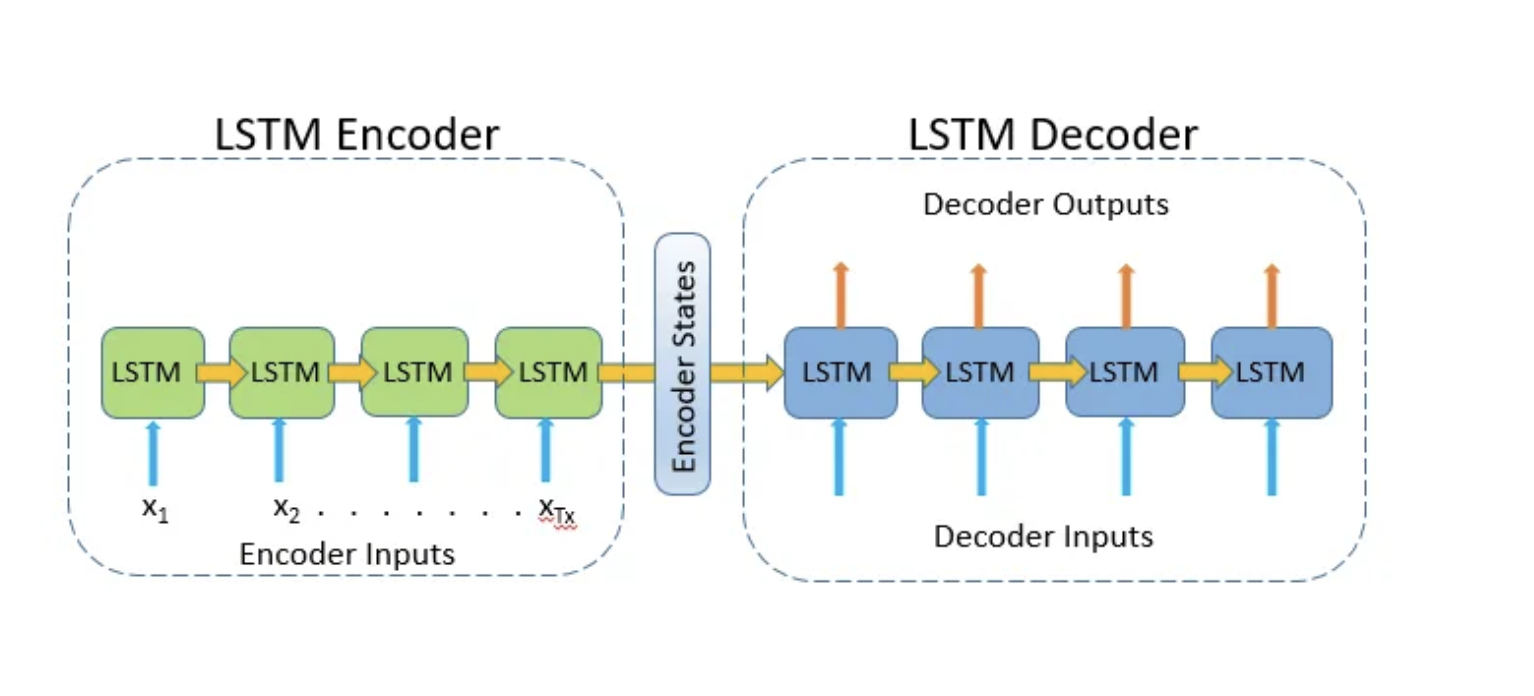

## Bidirectional LSTMs

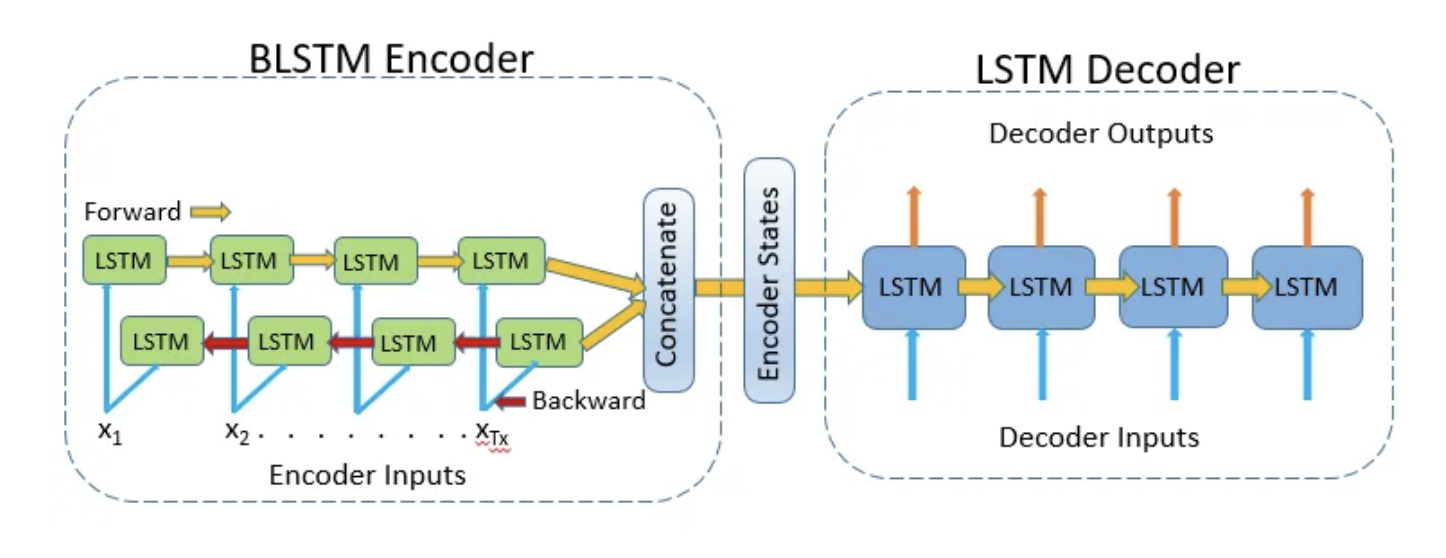

# Import libraries



In [236]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

# Load data + Preprocess + Feature Transformation

## Apple Stocks

In [237]:
data = pd.read_csv('/content/AAPL.csv')

In [238]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10661 entries, 0 to 10660
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  10661 non-null  int64         
 1   Date        10661 non-null  datetime64[ns]
 2   Close       10661 non-null  float64       
 3   Volume      10661 non-null  int64         
 4   Open        10661 non-null  float64       
 5   High        10661 non-null  float64       
 6   Low         10661 non-null  float64       
 7   Name        10661 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 666.4+ KB


In [240]:
data['Adj Close']=data['Close']
data=data.set_index(['Date'])
data.head()

,Unnamed: 0,Close,Volume,Open,High,Low,Name,Adj Close
Date,,,,,,,,
2023-03-24 00:00:00,0,160.25,59256340,158.86,160.3400,157.85,Apple,160.25
2023-03-23 00:00:00,1,158.93,67622060,158.83,161.5501,157.68,Apple,158.93
2023-03-22 00:01:40,2,157.83,75701810,159.30,162.1400,157.81,Apple,157.83
2023-03-21 00:00:00,3,159.28,73938290,157.32,159.4000,156.54,Apple,159.28
2023-03-20 00:00:00,4,157.40,73641420,155.07,157.8200,154.15,Apple,157.40


In [241]:
data.reset_index(inplace=True)

In [242]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10661 entries, 0 to 10660
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        10661 non-null  datetime64[ns]
 1   Unnamed: 0  10661 non-null  int64         
 2   Close       10661 non-null  float64       
 3   Volume      10661 non-null  int64         
 4   Open        10661 non-null  float64       
 5   High        10661 non-null  float64       
 6   Low         10661 non-null  float64       
 7   Name        10661 non-null  object        
 8   Adj Close   10661 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 749.7+ KB


In [243]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [244]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
0,2023-03-24 00:00:00,160.25
1,2023-03-23 00:00:00,158.93
2,2023-03-22 00:01:40,157.83
3,2023-03-21 00:00:00,159.28
4,2023-03-20 00:00:00,157.40
...,...,...
10656,2022-09-08 00:00:00,154.45
10657,2022-09-09 00:00:00,157.37
10658,2022-09-12 00:00:00,163.43
10659,2022-09-12 23:58:20,153.84


In [245]:
# X1=  x1[['beds','Reviews','rating']]
# y= x1['Log_price']

In [246]:
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand
0,2023-03-24 00:00:00,160.25,NaN
1,2023-03-23 00:00:00,158.93,-1.32
2,2023-03-22 00:01:40,157.83,-1.10
3,2023-03-21 00:00:00,159.28,1.45
4,2023-03-20 00:00:00,157.40,-1.88


In [247]:
data_feature_selected['differenced_demand_filled'] = np.where(pd.isnull(data_feature_selected['differenced_trasnformation_demand']), data_feature_selected['Adj Close'], data_feature_selected['differenced_trasnformation_demand'])
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled
0,2023-03-24 00:00:00,160.25,NaN,160.25
1,2023-03-23 00:00:00,158.93,-1.32,-1.32
2,2023-03-22 00:01:40,157.83,-1.10,-1.10
3,2023-03-21 00:00:00,159.28,1.45,1.45
4,2023-03-20 00:00:00,157.40,-1.88,-1.88


In [248]:
data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()
#np.testing.assert_array_equal(data_feature_selected['Adj Close'].values, data_feature_selected['differenced_inv_transformation_demand'].values)


In [249]:
data_feature_selected.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand
0,2023-03-24 00:00:00,160.25,NaN,160.25,160.25
1,2023-03-23 00:00:00,158.93,-1.32,-1.32,158.93
2,2023-03-22 00:01:40,157.83,-1.10,-1.10,157.83
3,2023-03-21 00:00:00,159.28,1.45,1.45,159.28
4,2023-03-20 00:00:00,157.40,-1.88,-1.88,157.40


# plot

In [250]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [251]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline


<Axes: xlabel='Date'>

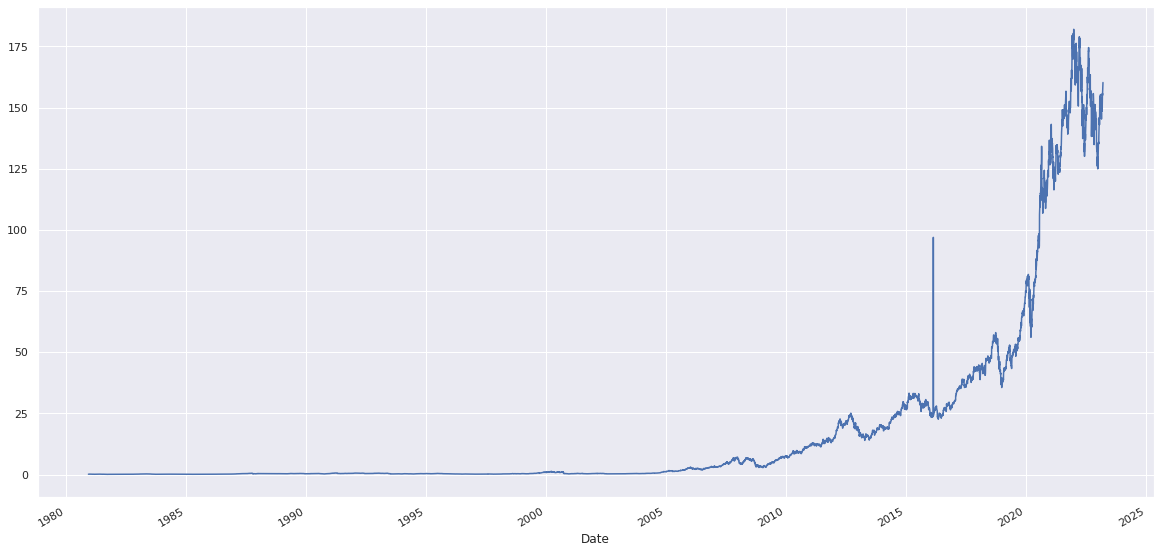

In [252]:
data.set_index('Date')['Close'].plot(figsize=FIGURE_SIZE)

<Axes: xlabel='Date'>

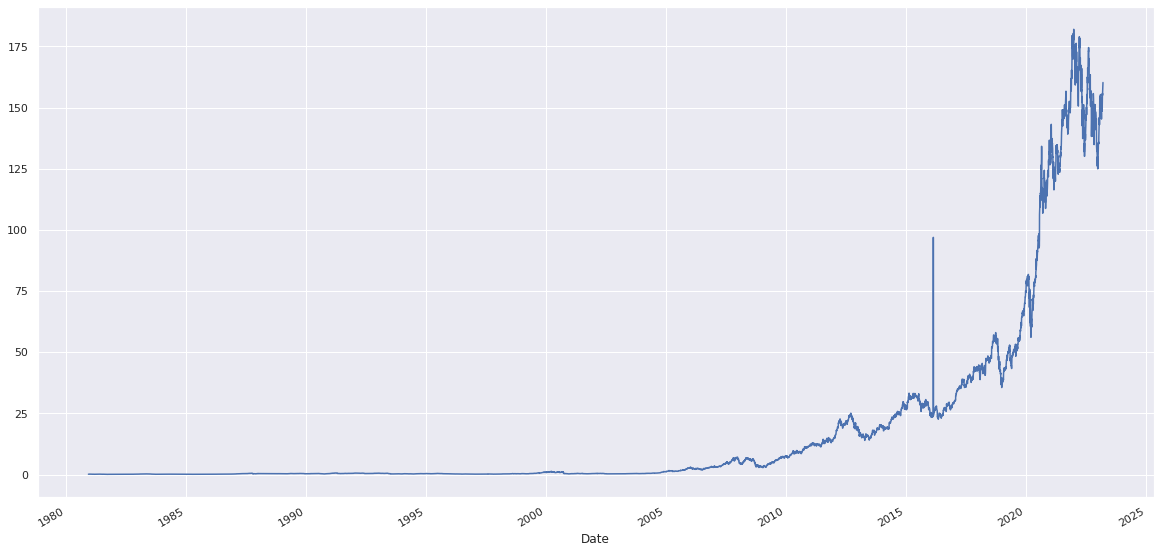

In [253]:
data_feature_selected.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

# Trasnformation 

<Axes: xlabel='Date'>

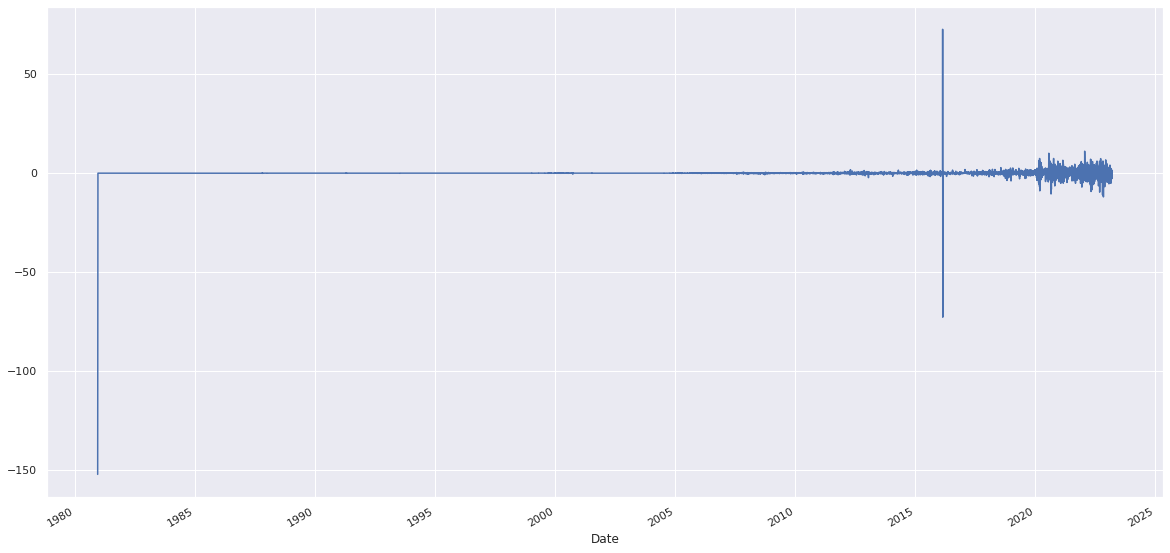

In [254]:
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

<Axes: xlabel='Date'>

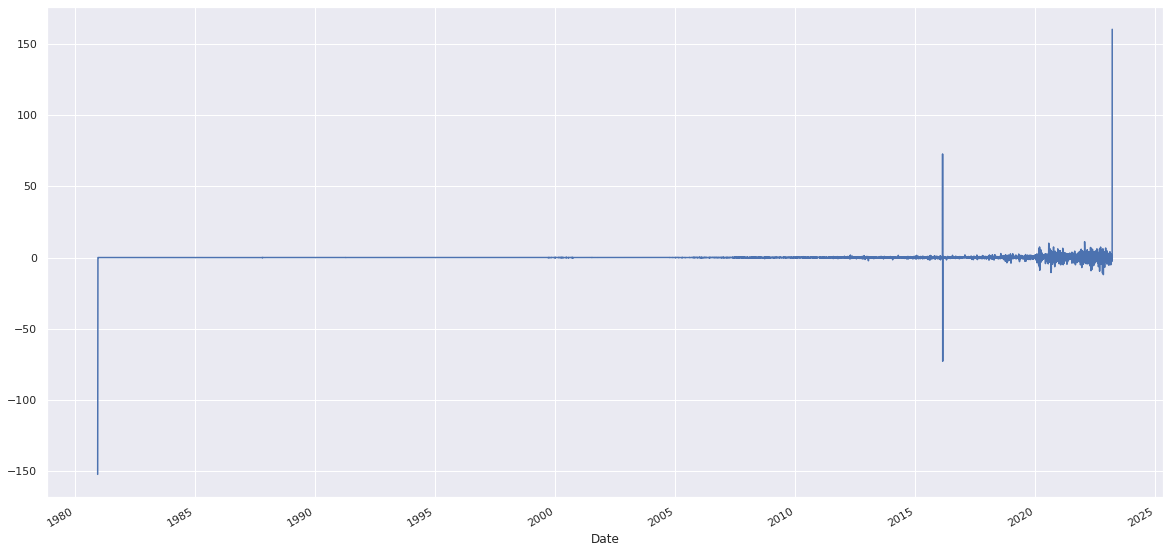

In [255]:
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(figsize=FIGURE_SIZE)

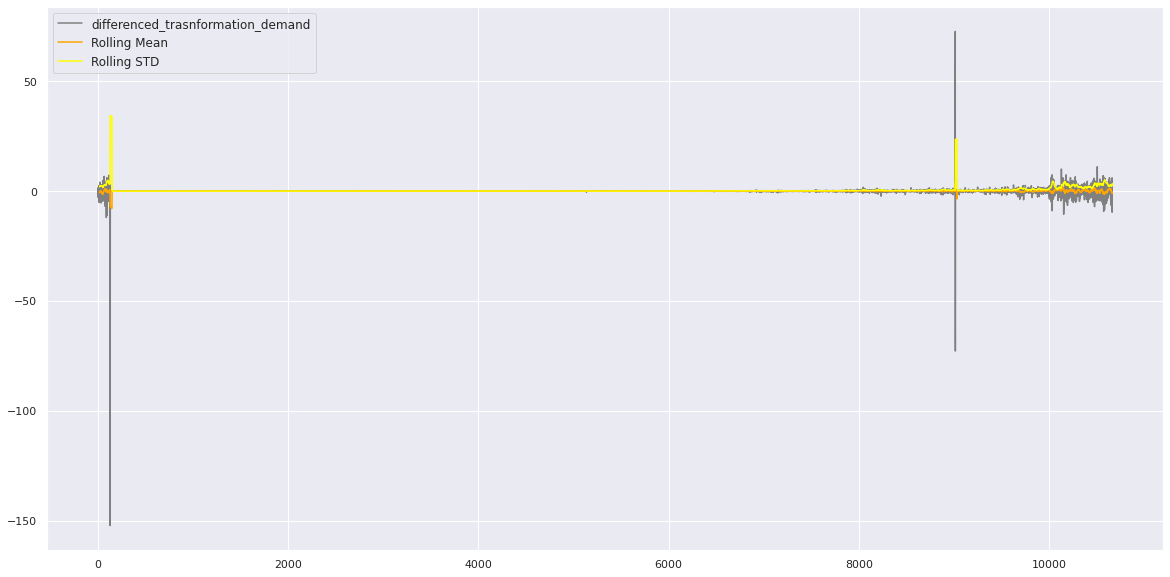

In [256]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_trasnformation_demand'][1:].plot(c='grey')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

KPSS test , to check stationary

In [257]:

# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data_feature_selected['differenced_demand_filled'])

KPSS Statistic: 0.10122835063457496
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [258]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    data_feature_selected['date'] = pd.to_datetime(data['Date'])
    data_feature_selected['year'] = data_feature_selected['Date'].dt.year
    data_feature_selected['month'] = data_feature_selected['Date'].dt.month
    data_feature_selected['week'] = data_feature_selected['Date'].dt.week
    data_feature_selected['day'] = data_feature_selected['Date'].dt.day
    data_feature_selected['dayofweek'] = data_feature_selected['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    data_feature_selected['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    data_feature_selected['is_weekend'] = (data_feature_selected['dayofweek'] > 5).astype(np.int8)
    
    return data_feature_selected

In [259]:
df1 = build_temporal_features(data_feature_selected)
df1.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2023-03-24 00:00:00,160.25,NaN,160.25,160.25,2023-03-24 00:00:00,2023,3,12,24,4,4,0
1,2023-03-23 00:00:00,158.93,-1.32,-1.32,158.93,2023-03-23 00:00:00,2023,3,12,23,3,4,0
2,2023-03-22 00:01:40,157.83,-1.10,-1.10,157.83,2023-03-22 00:01:40,2023,3,12,22,2,4,0
3,2023-03-21 00:00:00,159.28,1.45,1.45,159.28,2023-03-21 00:00:00,2023,3,12,21,1,3,0
4,2023-03-20 00:00:00,157.40,-1.88,-1.88,157.40,2023-03-20 00:00:00,2023,3,12,20,0,3,0


In [260]:
df1[df1.is_weekend == 1]

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
6595,2006-07-23 23:58:20,2.19,0.02,0.02,2.19,2006-07-23 23:58:20,2006,7,29,23,6,4,1
6605,2006-08-06 23:58:20,2.40,-0.04,-0.04,2.40,2006-08-06 23:58:20,2006,8,31,6,6,1,1
6615,2006-08-20 23:58:20,2.38,-0.05,-0.05,2.38,2006-08-20 23:58:20,2006,8,33,20,6,3,1
6634,2006-09-17 23:58:20,2.64,-0.01,-0.01,2.64,2006-09-17 23:58:20,2006,9,37,17,6,3,1
6644,2006-10-01 23:58:20,2.67,-0.08,-0.08,2.67,2006-10-01 23:58:20,2006,10,39,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,2020-06-14 23:58:20,85.75,1.05,1.05,85.75,2020-06-14 23:58:20,2020,6,24,14,6,2,1
10103,2020-06-28 23:58:20,90.44,2.03,2.03,90.44,2020-06-28 23:58:20,2020,6,26,28,6,4,1
10112,2020-07-12 23:58:20,95.48,-0.44,-0.44,95.48,2020-07-12 23:58:20,2020,7,28,12,6,2,1
10132,2020-08-09 23:58:20,112.73,1.62,1.62,112.73,2020-08-09 23:58:20,2020,8,32,9,6,2,1


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

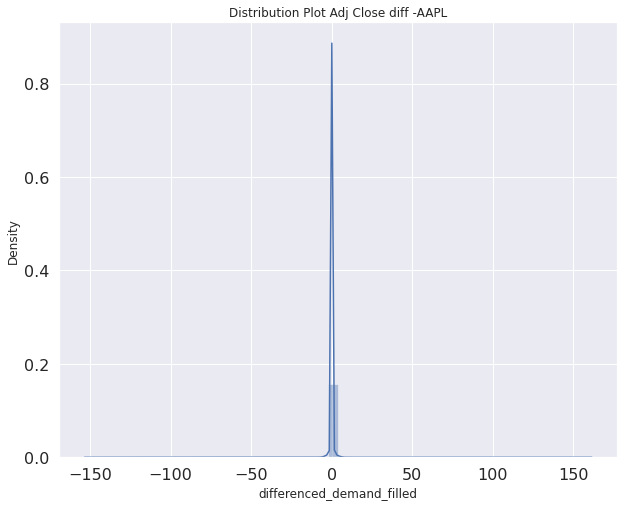

In [261]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df1['differenced_demand_filled']).set_title("Distribution Plot Adj Close diff -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save old data after transformation  and load 

In [262]:
df1 = data

In [263]:
df1

,Date,Unnamed: 0,Close,Volume,Open,High,Low,Name,Adj Close
0,2023-03-24 00:00:00,0,160.25,59256340,158.86,160.3400,157.85,Apple,160.25
1,2023-03-23 00:00:00,1,158.93,67622060,158.83,161.5501,157.68,Apple,158.93
2,2023-03-22 00:01:40,2,157.83,75701810,159.30,162.1400,157.81,Apple,157.83
3,2023-03-21 00:00:00,3,159.28,73938290,157.32,159.4000,156.54,Apple,159.28
4,2023-03-20 00:00:00,4,157.40,73641420,155.07,157.8200,154.15,Apple,157.40
...,...,...,...,...,...,...,...,...,...
10656,2022-09-08 00:00:00,10524,154.45,83838328,154.60,156.3400,152.72,Apple,154.45
10657,2022-09-09 00:00:00,10525,157.37,67565208,155.41,157.7800,154.76,Apple,157.37
10658,2022-09-12 00:00:00,10526,163.43,102847776,159.53,164.2500,159.42,Apple,163.43
10659,2022-09-12 23:58:20,10527,153.84,121387072,159.79,160.5200,153.41,Apple,153.84


selecting y as ['Adj Close']

In [264]:
y = df1['Adj Close']

In [265]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [266]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [267]:
training_size,test_size

(6929, 3732)

In [268]:
train_data[2]

array([0.86711365])

In [269]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [270]:
import numpy

In [271]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [272]:
print(X_train.shape), print(y_train.shape)

(6828, 100)
(6828,)


(None, None)

In [273]:
print(X_test.shape), print(ytest.shape)

(3631, 100)
(3631,)


(None, None)

In [274]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [275]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


In [276]:

def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history1.history['loss'], 'o-', mfc='none', markersize=10, 
  label='Train')
  plt.plot(history1.history['val_loss'], 'o-', mfc='none', 
  markersize=10, label='Valid')
  plt.title('LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [277]:
#history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=64,verbose=1)

EarlyStopping


In [278]:
from tensorflow.keras.callbacks import EarlyStopping


In [279]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Bidirectional LSTM

# Apple Stocks

In [280]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


In [281]:
tf.random.set_seed(7)

In [282]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [283]:
from tensorflow.keras.callbacks import EarlyStopping

In [284]:
with tf.device('/device:GPU:0'):
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
          verbose=1, mode='auto', restore_best_weights=True)

  history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
          callbacks=[monitor],verbose=1,epochs=10)

Epoch 1/10
214/214 [==============================] - 74s 332ms/step - loss: 6520770048.0000 - val_loss: 0.0222
Epoch 2/10
214/214 [==============================] - 70s 329ms/step - loss: 9.2574e-04 - val_loss: 0.0216
Epoch 3/10
214/214 [==============================] - 68s 318ms/step - loss: 6.5081e-04 - val_loss: 0.0083
Epoch 4/10
214/214 [==============================] - 67s 313ms/step - loss: 4.0385e-04 - val_loss: 0.0059
Epoch 5/10
214/214 [==============================] - 67s 314ms/step - loss: 2.9079e-04 - val_loss: 7.2581e-04
Epoch 6/10
214/214 [==============================] - 70s 327ms/step - loss: 2.4439e-04 - val_loss: 0.0011
Epoch 7/10
214/214 [==============================] - 70s 327ms/step - loss: 2.2414e-04 - val_loss: 0.0024
Epoch 8/10
214/214 [==============================] - 66s 309ms/step - loss: 2.0462e-04 - val_loss: 6.8653e-04
Epoch 9/10
214/214 [==============================] - 67s 314ms/step - loss: 2.0651e-04 - val_loss: 0.0019
Epoch 10/10
214/214 [===

In [285]:
modell.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 200)              81600     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


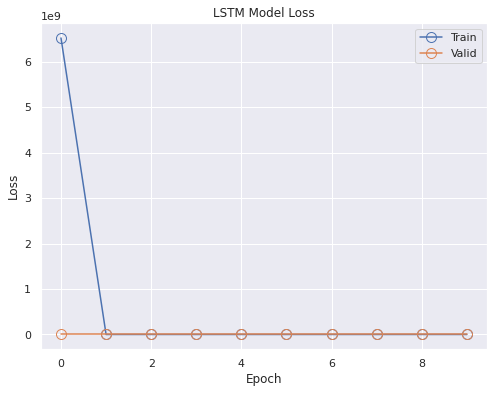

In [286]:
plot_1(history1, 'Training / Validation Losses from History')

In [287]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

114/114 [==============================] - 3s 27ms/step


In [288]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [289]:
import math
from sklearn.metrics import mean_squared_error

In [290]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

60.35675736510358

In [291]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10.055033378654116

In [292]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

114/114 [==============================] - 4s 33ms/step


3631

In [293]:
def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history1.history['loss'], 'o-', mfc='none', markersize=10, 
  label='Train')
  plt.plot(history1.history['val_loss'], 'o-', mfc='none', 
  markersize=10, label='Valid')
  plt.title('Bi LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


In [294]:
def evaluate_predictions(predictions, ytest, outliers):
    ratio = []
    differences = []
    for pred in range(len(ytest)):
        ratio.append((ytest[pred]/predictions[pred])-1)
        differences.append(abs(ytest[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [295]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [296]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

1982    0.120300
3119    0.638411
3441    0.887390
3475    0.866408
3439    0.869996
3113    0.602009
3112    0.594992
3476    0.875838
3101    0.543078
3218    0.704171
3477    0.885252
3440    0.879844
3115    0.616053
3512    0.877742
3098    0.519914
3444    0.907350
3438    0.862854
3118    0.631989
3602    0.836554
3114    0.609838
3147    0.608827
3219    0.711985
3120    0.647418
3099    0.528166
3510    0.853549
3200    0.677079
3474    0.862202
3609    0.872594
3336    0.746921
3610    0.880021
3097    0.512432
3511    0.866157
3607    0.860922
3603    0.842164
3513    0.891286
3331    0.725921
dtype: float64

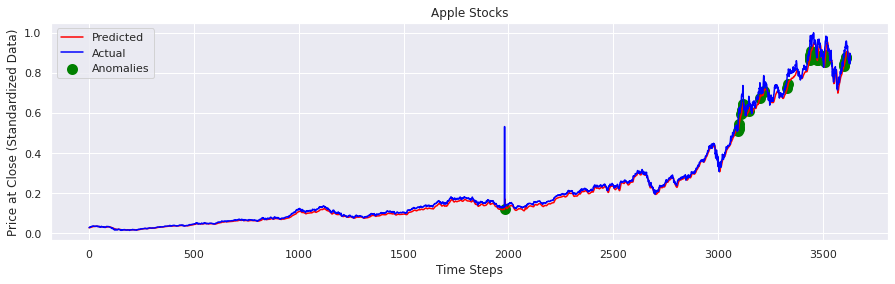

In [297]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.title("Apple Stocks")
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

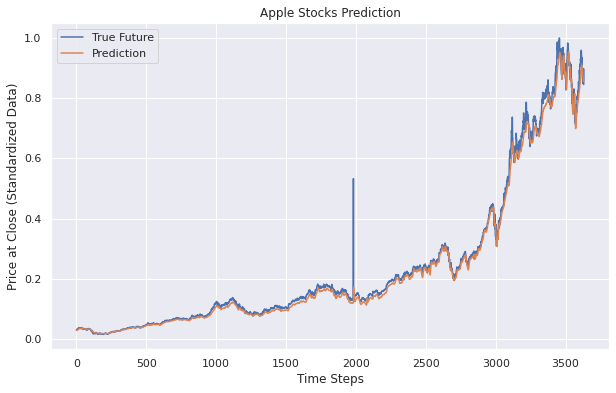

In [298]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.title("Apple Stocks Prediction")
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


# Amazon Stocks

In [327]:
df=pd.read_csv("/content/Amazon.csv")

In [354]:
y = df['Close']

In [356]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [342]:
y

array([[0.17659241],
       [0.17763691],
       [0.1776189 ],
       ...,
       [0.2456014 ],
       [0.22825911],
       [0.23151867]])

In [357]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [358]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [359]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [361]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [362]:
with tf.device('/device:GPU:0'):
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
          verbose=1, mode='auto', restore_best_weights=True)

  history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
          callbacks=[monitor],verbose=1,epochs=5)

Epoch 1/5
130/130 [==============================] - 123s 383ms/step - loss: 1.2211e-04 - val_loss: 0.0025
Epoch 2/5
130/130 [==============================] - 55s 427ms/step - loss: 4.6401e-05 - val_loss: 9.5973e-04
Epoch 3/5
130/130 [==============================] - 44s 337ms/step - loss: 3.6535e-05 - val_loss: 4.7417e-04
Epoch 4/5
130/130 [==============================] - 53s 403ms/step - loss: 4.5338e-05 - val_loss: 4.9184e-04
Epoch 5/5
130/130 [==============================] - 41s 316ms/step - loss: 3.9110e-05 - val_loss: 8.5272e-04


In [365]:
modell.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 200)              81600     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


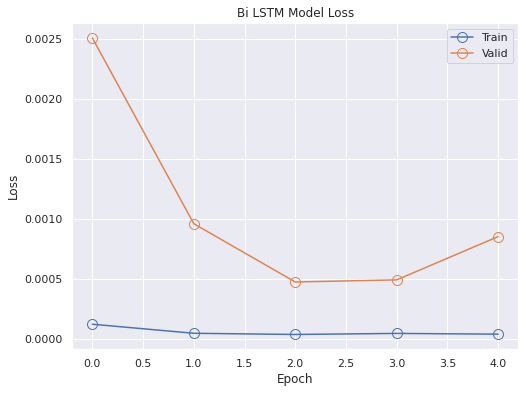

In [366]:
plot_1(history1, 'Training / Validation Losses from History')

In [368]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

69/69 [==============================] - 2s 27ms/step


In [369]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [370]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

84.72228087569817

In [371]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10.50894846120129

In [372]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

69/69 [==============================] - 2s 27ms/step


2178

In [373]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [374]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

529     0.046357
530     0.172039
531     0.145742
532     0.125907
1877    0.273511
2026    0.226823
2055    0.234486
533     0.107481
1694    0.254394
1878    0.277606
1879    0.281359
2028    0.236474
1973    0.278687
2054    0.229736
2057    0.244504
2027    0.232028
1712    0.247044
1625    0.223941
2056    0.239926
1966    0.271307
1695    0.259462
dtype: float64

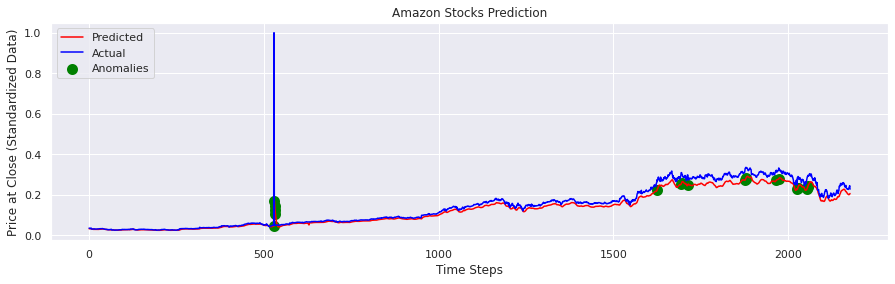

In [375]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.title("Amazon Stocks Prediction")
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

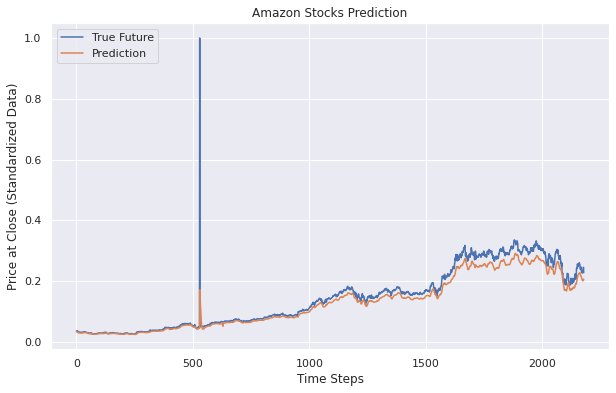

In [376]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.title("Amazon Stocks Prediction")
plt.show()


# META Stocks

In [377]:
df=pd.read_csv("/content/Facebook.csv")

In [378]:
y = df['Close']

In [379]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [380]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [381]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [382]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [383]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [384]:
with tf.device('/device:GPU:0'):
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
          verbose=1, mode='auto', restore_best_weights=True)

  history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
          callbacks=[monitor],verbose=1,epochs=10)

Epoch 1/10
53/53 [==============================] - 20s 321ms/step - loss: 0.0145 - val_loss: 71423284477952.0000
Epoch 2/10
53/53 [==============================] - 16s 297ms/step - loss: 9.5091e-04 - val_loss: 0.0136
Epoch 3/10
53/53 [==============================] - 17s 320ms/step - loss: 5.3834e-04 - val_loss: 0.0066
Epoch 4/10
53/53 [==============================] - 16s 308ms/step - loss: 4.3109e-04 - val_loss: 0.0043
Epoch 5/10
53/53 [==============================] - 16s 297ms/step - loss: 3.8103e-04 - val_loss: 0.0010
Epoch 6/10
53/53 [==============================] - 16s 307ms/step - loss: 3.6969e-04 - val_loss: 9.0390e-04
Epoch 7/10
53/53 [==============================] - 16s 301ms/step - loss: 3.5517e-04 - val_loss: 7.8317e-04
Epoch 8/10
53/53 [==============================] - 17s 323ms/step - loss: 3.1735e-04 - val_loss: 0.0016
Epoch 9/10
53/53 [==============================] - 17s 318ms/step - loss: 3.0327e-04 - val_loss: 0.0016
Epoch 10/10
53/53 [===================

In [ ]:
modell.summary()

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

In [ ]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

In [ ]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [ ]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.title("Meta Stocks Prediction")
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.title("Meta Stocks Prediction")
plt.show()


# Google Class A + C

In [ ]:
df1=pd.read_csv("/content/Google_classA.csv")
df2=pd.read_csv("/content/Google_classC.csv")
df= pd.concat([df1,df2])

In [ ]:
y = df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [401]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [402]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [403]:
with tf.device('/device:GPU:0'):
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
          verbose=1, mode='auto', restore_best_weights=True)

  history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
          callbacks=[monitor],verbose=1,epochs=10)

Epoch 1/10
138/138 [==============================] - 44s 299ms/step - loss: 5.2752e-04 - val_loss: 4.2758e-04
Epoch 2/10
138/138 [==============================] - 42s 304ms/step - loss: 2.5426e-04 - val_loss: 4.1052e-04
Epoch 3/10
138/138 [==============================] - 42s 305ms/step - loss: 2.4082e-04 - val_loss: 4.1875e-04
Epoch 4/10
138/138 [==============================] - 43s 310ms/step - loss: 2.4084e-04 - val_loss: 4.0478e-04
Epoch 5/10
138/138 [==============================] - 42s 307ms/step - loss: 2.3298e-04 - val_loss: 4.0619e-04
Epoch 6/10
138/138 [==============================] - 42s 306ms/step - loss: 2.3161e-04 - val_loss: 4.0161e-04
Epoch 7/10
138/138 [==============================] - 41s 301ms/step - loss: 2.2784e-04 - val_loss: 4.0049e-04
Epoch 8/10
138/138 [==============================] - 42s 308ms/step - loss: 2.2567e-04 - val_loss: 4.0023e-04
Epoch 9/10
138/138 [==============================] - 42s 301ms/step - loss: 2.2567e-04 - val_loss: 4.0223e-04
E

In [ ]:
modell.summary()

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

In [ ]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

In [ ]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [ ]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.title("Google Stocks Prediction")
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.title("Google Stocks Prediction")
plt.show()


# Netflix Stocks

In [ ]:
df=pd.read_csv("/content/Netflix.csv")

In [ ]:
y = df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




In [ ]:
with tf.device('/device:GPU:0'):
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
          verbose=1, mode='auto', restore_best_weights=True)

  history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
          callbacks=[monitor],verbose=1,epochs=10)

In [423]:
modell.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 200)              81600     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

In [ ]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

In [ ]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [ ]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.title("Netflix Stocks Prediction")
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

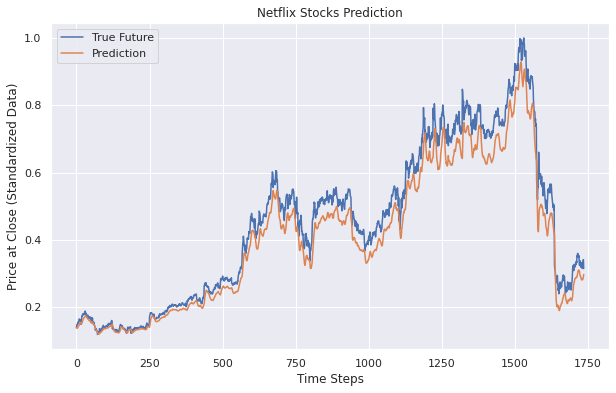

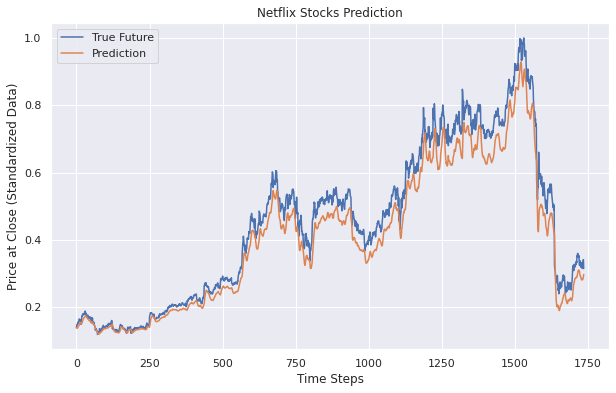

In [433]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.title("Netflix Stocks Prediction")
plt.show()


## ref : https://towardsdatascience.com/time-series-forecasting-with-deep-stacked-unidirectional-and-bidirectional-lstms-de7c099bd918

https://github.com/A-safarji/Time-series-deep-learning/
